### PCA example

This example shows how PCA can help computing a low dimensional kernel density estimation (KDE) to learn a generative model for a dataset. With this generative model in place, new samples can be drawn. These new samples reflect the underlying model of the data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [3]:
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA

#### load dataset

In [4]:
import pickle

In [5]:
with open('../../data/mnist/mnist_784.pkl', 'rb') as pkl:
    mnist = pickle.load(pkl)

- digits are images of 784 pixels (size: 28x28)

In [7]:
df = mnist.data
df.head(3)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### examples

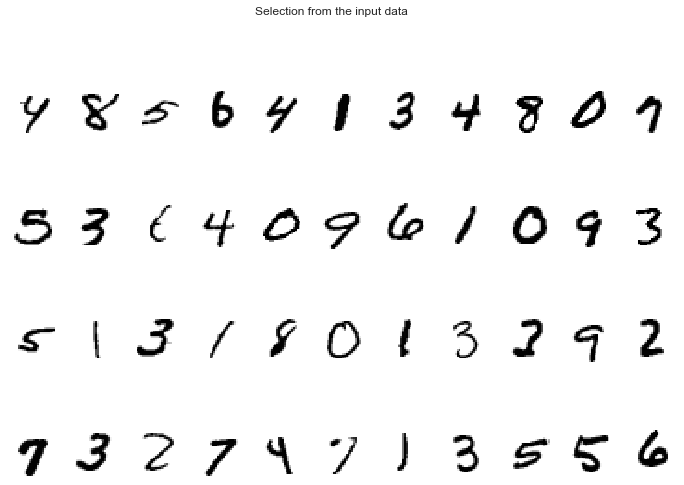

In [42]:
fig, axs = plt.subplots(4, 11, subplot_kw = dict(xticks=[], yticks=[]), figsize = (12, 8))
fig.suptitle("Selection from the input data")
for i, axi in zip(np.random.randint(0, df.shape[0], 44), axs.flatten()):
    im = axi.imshow(
        df.iloc[i, :].to_numpy().reshape((28, 28)), cmap = plt.cm.binary, interpolation = "nearest"
    )
    #im.set_clim(0, 256)

#### project the 784-dimensional data to a lower dimension

In [78]:
dims = 10

In [79]:
pca = PCA(n_components = dims, whiten = False)
data = pca.fit_transform(df)

In [80]:
data.shape

(70000, 10)

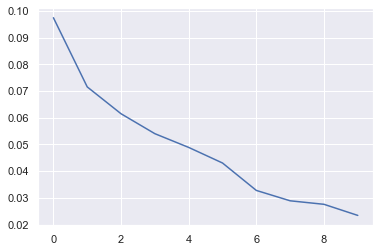

In [81]:
plt.plot(pca.explained_variance_ratio_);

#### compute the low-D join distribution

In [82]:
kde = KernelDensity(kernel = 'gaussian', bandwidth = 1).fit(data)

#### sample 44 new points from the data


In [83]:
new_data = kde.sample(44, random_state = 0)

In [84]:
new_data.shape

(44, 10)

In [85]:
new_data = pca.inverse_transform(new_data)

In [86]:
new_data.shape

(44, 784)

#### plot resampled digits

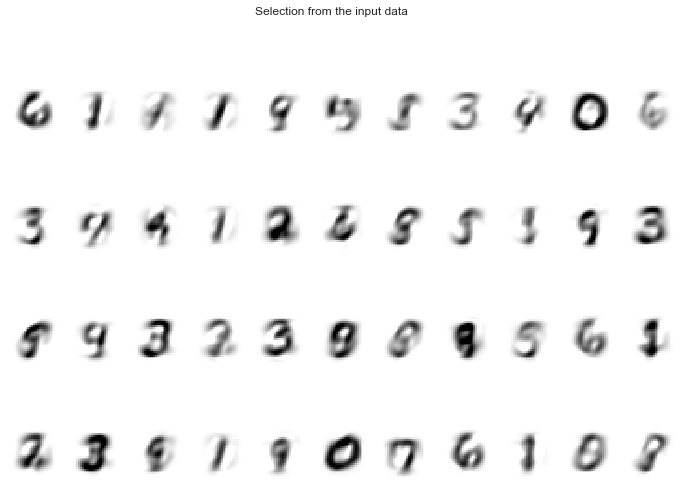

In [87]:
fig, axs = plt.subplots(4, 11, subplot_kw = dict(xticks=[], yticks=[]), figsize = (12, 8))
fig.suptitle("Selection from the input data")
for i, axi in enumerate(axs.flatten()):
    im = axi.imshow(
        new_data[i].reshape((28, 28)), cmap = plt.cm.binary, interpolation = "nearest"
    )
    im.set_clim(0, 256)

#### PCA scree plot

In [61]:
def scree_plot(pca, expVar = 1):
    dims = np.where(np.cumsum(pca.explained_variance_ratio_) <= expVar)[0][-1]
    _, axs = plt.subplots(1, 2, figsize = (12, 5))    
    axs[0].set_ylabel("Explained Variance")
    axs[0].set_xlabel("#dims")
    axs[0].set_title("Explained Variance dims = %3d" %(pca.n_components_ if dims is None else dims))
    axs[0].set_ylim(0, max(pca.explained_variance_))
    axs[0].axhline(y = 1,color = 'b', linestyle = '--')
    axs[0].plot(pca.explained_variance_[:dims],'bo-')
    axs[1].set_ylabel("Explained Variance Ratio")
    axs[1].set_xlabel("#dims")
    axs[1].set_title("Explained Variance %6.4f" %np.cumsum(pca.explained_variance_ratio_[:dims])[-1])
    axs[1].set_ylim(0, 1)
    axs[1].axhline(y = 1,color = 'b', linestyle = '--')
    axs[1].plot(np.cumsum(pca.explained_variance_ratio_[:dims]),'bo-')

In [65]:
%%time
pca_mle = PCA(n_components = 'mle', whiten = False).fit(df)

CPU times: user 2min 46s, sys: 448 ms, total: 2min 46s
Wall time: 2min 25s


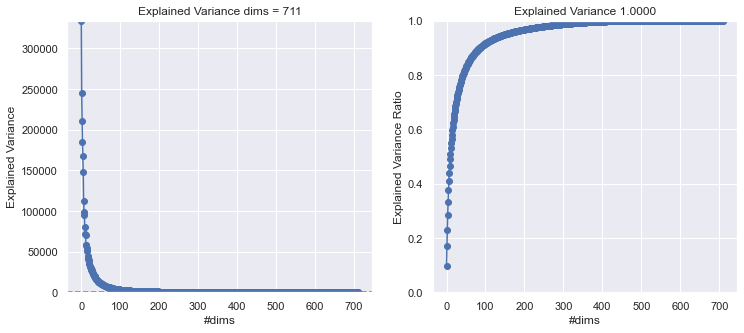

In [66]:
scree_plot(pca_mle)

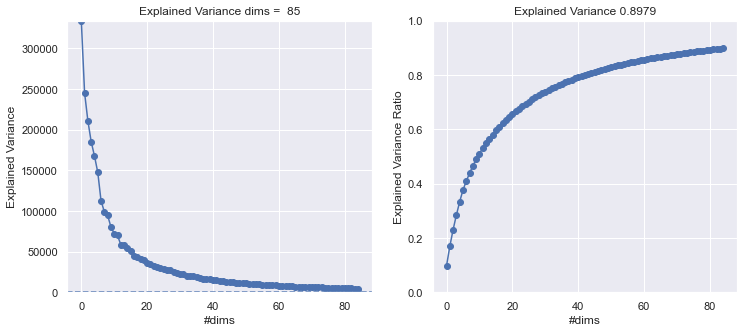

In [67]:
scree_plot(pca_mle, expVar = .9)